In [1]:
%pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / - done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=fbe21334919462aadd596235f170db12e511d066979224c37ce4509cc6eb9eb9
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings

# warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

---
Fuzzy Corn Disease
---

-
set Up the variable

In [3]:
age = ctrl.Antecedent(np.arange(0, 96, 1), 'age')
hole_on_leaf = ctrl.Antecedent(np.arange(0, 36, 1), 'hole_on_leaf')
plant_color = ctrl.Antecedent(np.arange(0, 90, 1), 'plant_color')
spots_on_plant = ctrl.Antecedent(np.arange(0, 90, 1), 'spots_on_plant')
fruit = ctrl.Antecedent(np.arange(0, 25, 1), 'fruit')
disease = ctrl.Consequent(np.arange(0,10,1),'disease')

-
age membership setup

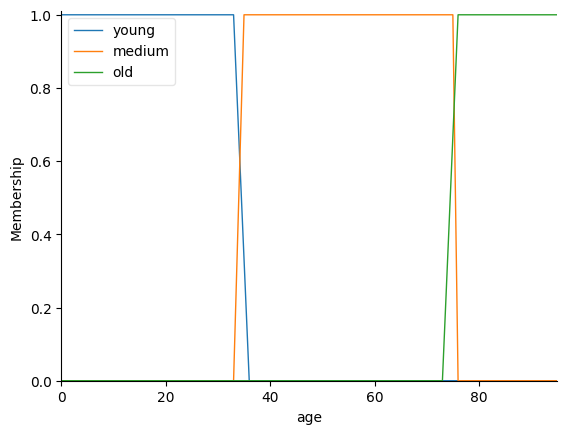

In [4]:
age['young'] = fuzz.trapmf(age.universe,[0,0,33,36])
age['medium'] = fuzz.trapmf(age.universe,[33,35,75,76])
age['old'] = fuzz.trapmf(age.universe,[73,76,96,96])

age.view()

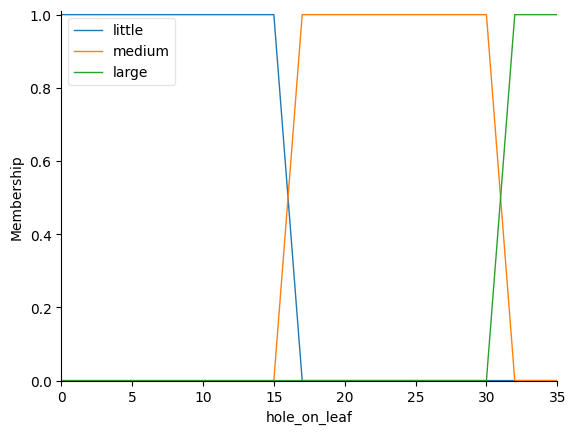

In [5]:
hole_on_leaf['little'] = fuzz.trapmf(hole_on_leaf.universe,[0,0,15,17])
hole_on_leaf['medium'] = fuzz.trapmf(hole_on_leaf.universe,[15,17,30,32])
hole_on_leaf['large'] = fuzz.trapmf(hole_on_leaf.universe,[30,32,45,45])

hole_on_leaf.view()

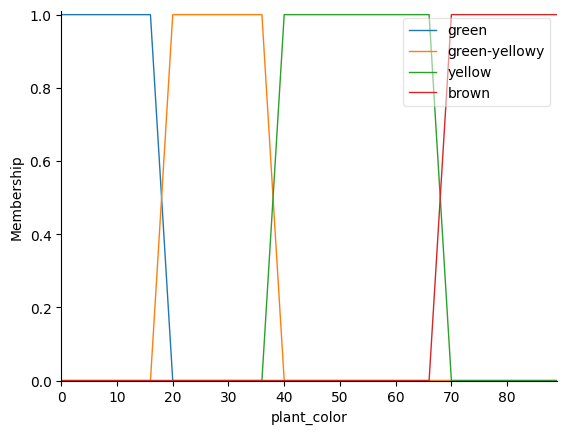

In [6]:
plant_color['green'] = fuzz.trapmf(plant_color.universe,[0,0,16,20])
plant_color['green-yellowy'] = fuzz.trapmf(plant_color.universe,[16,20,36,40])
plant_color['yellow'] = fuzz.trapmf(plant_color.universe,[36,40,66,70])
plant_color['brown'] = fuzz.trapmf(plant_color.universe,[66,70,90,90])

plant_color.view()

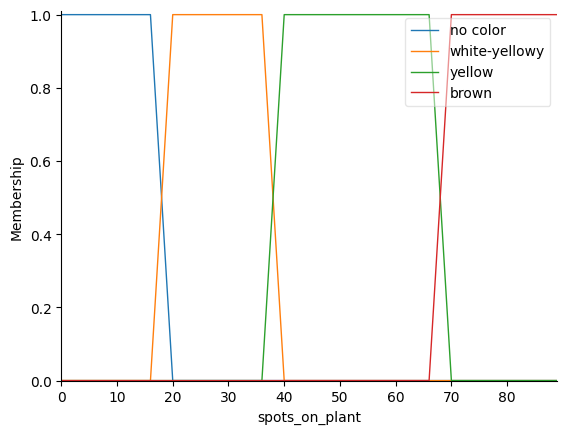

In [7]:
spots_on_plant['no color'] = fuzz.trapmf(plant_color.universe,[0,0,16,20])
spots_on_plant['white-yellowy'] = fuzz.trapmf(plant_color.universe,[16,20,36,40])
spots_on_plant['yellow'] = fuzz.trapmf(plant_color.universe,[36,40,66,70])
spots_on_plant['brown'] = fuzz.trapmf(plant_color.universe,[66,70,90,90])

spots_on_plant.view()

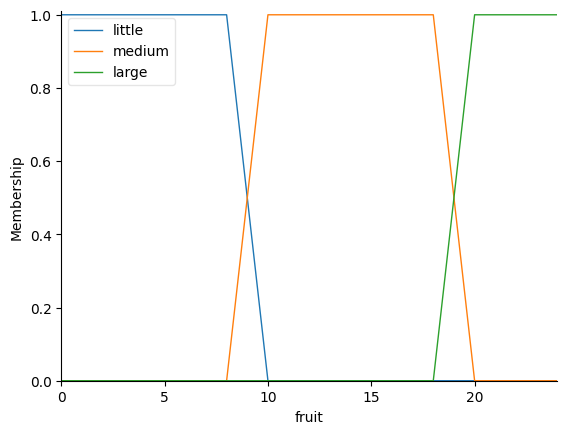

In [8]:
fruit['little'] = fuzz.trapmf(fruit.universe,[0,0,8,10])
fruit['medium'] = fuzz.trapmf(fruit.universe,[8,10,18,20])
fruit['large'] = fuzz.trapmf(fruit.universe,[18,20,25,30])

fruit.view()

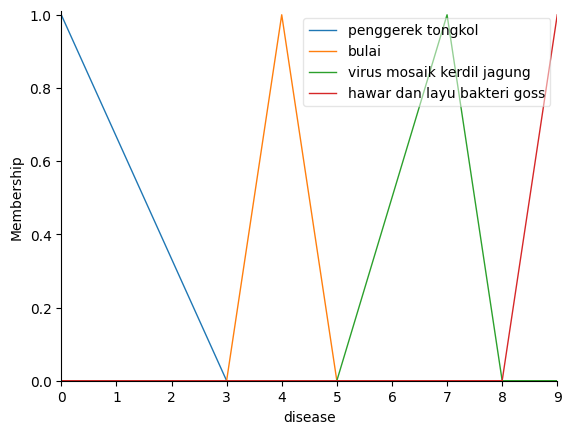

In [9]:
disease['penggerek tongkol'] = fuzz.trimf(disease.universe,[0,0,3])
disease['bulai'] =  fuzz.trimf(disease.universe,[3,4,5])
disease['virus mosaik kerdil jagung'] =  fuzz.trimf(disease.universe,[5,7,8])
disease['hawar dan layu bakteri goss'] =  fuzz.trimf(disease.universe,[8,9,10])

disease.view()

Setting up rule
---

In [10]:
rule1 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['green'], disease['penggerek tongkol'])
rule2 = ctrl.Rule(age['medium'] & hole_on_leaf['medium'] & plant_color['green-yellowy'], disease['penggerek tongkol'])
rule3 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['green-yellowy'], disease['bulai'])
rule4 = ctrl.Rule(age['medium'] & hole_on_leaf['little'] & plant_color['green'] & spots_on_plant['white-yellowy'], disease['bulai'])
rule5 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['yellow'] & spots_on_plant['no color'], disease['virus mosaik kerdil jagung'])
rule6 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['yellow'] & spots_on_plant['no color'] & fruit['little'], disease['virus mosaik kerdil jagung'])
rule7 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['yellow'], disease['hawar dan layu bakteri goss'])
rule8 = ctrl.Rule(age['medium'] & hole_on_leaf['little'] & plant_color['brown'], disease['hawar dan layu bakteri goss'])
rule9 = ctrl.Rule(age['old'] & hole_on_leaf['large'] & plant_color['yellow'], disease['penggerek tongkol'])
rule10 = ctrl.Rule(age['medium'] & hole_on_leaf['little'] & plant_color['green'] & spots_on_plant['no color'], disease['penggerek tongkol'])
rule11 = ctrl.Rule(age['medium'] & hole_on_leaf['little'] & plant_color['green-yellowy'] & spots_on_plant['no color'] & fruit['medium'], disease['penggerek tongkol'])
rule12 = ctrl.Rule(age['medium'] & hole_on_leaf['medium'] & plant_color['yellow'], disease['bulai'])
rule13 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['green-yellowy'] & spots_on_plant['white-yellowy'] & fruit['little'], disease['bulai'])
rule14 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['green-yellowy'], disease['virus mosaik kerdil jagung'])
rule15 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['yellow'], disease['virus mosaik kerdil jagung'])
rule16 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['yellow'] & spots_on_plant['no color'] & fruit['little'], disease['virus mosaik kerdil jagung'])
rule17 = ctrl.Rule(age['old'] & hole_on_leaf['little'] & plant_color['brown'], disease['hawar dan layu bakteri goss'])
rule18 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['yellow'] & spots_on_plant['yellow'], disease['hawar dan layu bakteri goss'])
rule19 = ctrl.Rule(age['young'] & hole_on_leaf['little'] & plant_color['brown'] & spots_on_plant['yellow'] & fruit['little'], disease['hawar dan layu bakteri goss'])
rule20 = ctrl.Rule(age['medium'] & hole_on_leaf['little'] & plant_color['brown'] & spots_on_plant['yellow'] & fruit['little'], disease['hawar dan layu bakteri goss'])
rule21 = ctrl.Rule(age['old'] & hole_on_leaf['little'] & plant_color['brown'] & spots_on_plant['yellow'] & fruit['little'], disease['hawar dan layu bakteri goss'])

In [11]:
classifications_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21])
classifications = ctrl.ControlSystemSimulation(classifications_ctrl)

3.9166666666666674


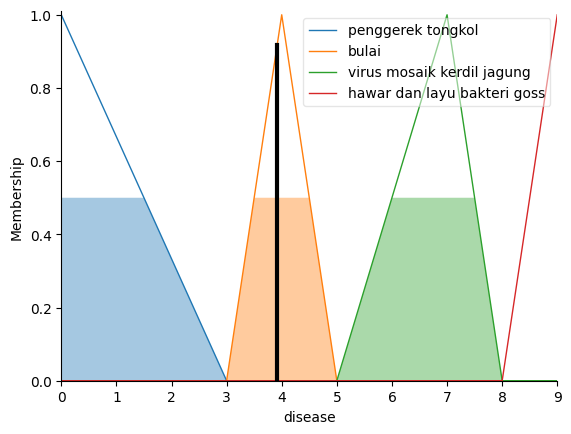

In [12]:
classifications.input['age'] = 34
classifications.input['hole_on_leaf'] = 16 
classifications.input['plant_color'] = 19
classifications.input['spots_on_plant'] = 19
classifications.input['fruit'] = 9

classifications.compute()

print(classifications.output['disease'])
disease.view(sim=classifications)